# <center>  Registro de Imágenes </center>

El registro de imágenes consiste en trasformar un conjunto de imágenes de una escena a un mismo sistema coordenado. 


<center>
<figure>
<img src='https://miro.medium.com/max/1400/1*fQ1JFS4yWLea8Q3PaFym9g.png' width="600"> 
<figcaption><a href="https://medium.com/sicara/image-registration-sift-deep-learning-3c794d794b7a"> Registro de Imágenes</a></figcaption>
</figure>
</center>

## Transformación de Coordenadas  


<center>
<figure>
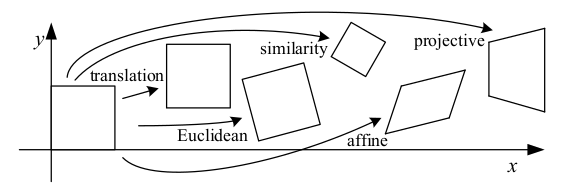 
<figcaption><a href=""> Transformación de Coordenadas</a></figcaption>
</figure>
</center>

### Translación 

$$\bf{\hat{x}} = \bf{x} + \bf{t}$$


$$\begin{bmatrix}
x' \\ y'
\end{bmatrix} =  \begin{bmatrix}
1 & 0 \\ 0 & 1
\end{bmatrix}  \begin{bmatrix}
x \\ y
\end{bmatrix} + \ \begin{bmatrix}
t_1 \\ t_2
\end{bmatrix}$$


$$
\begin{bmatrix}
x' \\ y'
\end{bmatrix} =  \begin{bmatrix}
1 & 0 & t_1 \\ 0 & 1 & t_2
\end{bmatrix}  \begin{bmatrix}
x \\ y \\ 1
\end{bmatrix} 
$$

$$
\begin{matrix}
\bf{x} = [\bf{I} \ \bf{t}]_{2 \times 3} \bar{\bf{x} }
\end{matrix}
$$

### Euclidea
Rotación más Traslación

$$\bf{\hat{x}} = \bf{R}\bf{x} + \bf{t}
$$

$$
\bf{x} = [\bf{R} \ \bf{t}]_{2 \times 3} \bar{\bf{x} }
$$

donde 


$$
\bf{R} = \begin{bmatrix}
cos \theta & -sin \theta \\ sin \theta & cos \theta 
\end{bmatrix}
$$

### Similaridad
Rotación escalada 

$$
\bf{\hat{x}} = s\bf{R}\bf{x} + \bf{t}
$$

$$
\bf{x} = [s\bf{R} \ \bf{t}]_{2 \times 3} \bar{\bf{x} }
$$

Donde $s$ es un factor de escala 

###  Transformación afín 

$$\bf{\hat{x}} = \bf{A}\bf{\bar{x}}$$

### Transformación Proyectiva 

$$
\bf{\hat{\bar{x}}} = \bf{H} \bf{\bar{x}}
$$



$$
\begin{bmatrix}
u' \\ w' \\ z'
\end{bmatrix} =  \begin{bmatrix}
h_{1,1} & h_{1,2}  & h_{1,3} \\
h_{2,1} & h_{2,2}  & h_{2,3} \\
h_{3,1} & h_{3,2}  & h_{3,3}
\end{bmatrix}  \begin{bmatrix}
x \\ y \\ 1
\end{bmatrix} 
$$

$$
\bf{\hat{x}} = \begin{bmatrix}
\frac{u'}{z'} \\ \frac{w'}{z'} 
\end{bmatrix}
$$



<center>
<figure>
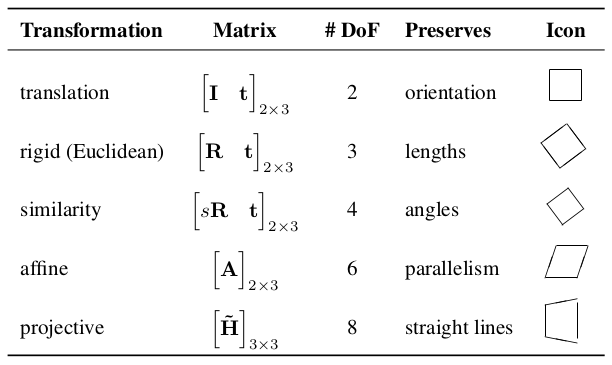 
<figcaption><a href=""> Transformación de Coordenadas en 2D</a></figcaption>
</figure>
</center>

### Transformaciones no rígidas 

Las anteriores transformaciones son las denominadas rígidas, lo que significa que todos los puntos de la imagen son transformados exactamente de la misma forma. En ocasiones esto no es suficiente. Por ejemplo en aplicaciones médicas,cada localidad de la imagen requiere ser transformada de forma diferente debido a que el cuerpo no es rígido. 


<center>
<figure>
<img src='https://www.researchgate.net/profile/William-Crum-2/publication/8055471/figure/fig1/AS:277798666162176@1443243771035/Schematic-showing-rigid-and-non-rigid-registration.png' width="400"> 
<figcaption><a href="https://www.researchgate.net/figure/Schematic-showing-rigid-and-non-rigid-registration_fig1_8055471"> Registro de Imágenes</a></figcaption>
</figure>
</center>


## Registro clásico



<center>
<figure>
<img src='https://images.storychief.com/account_16771/4_079ea7f537ac4df2c855a2e32ca5f389_800.png' width="800"> 
<figcaption><a href="https://www.sicara.ai/blog/2019-07-16-image-registration-deep-learning"> Registro de Imágenes</a></figcaption>
</figure>
</center>

El concepto clave en los algoritmos clásicos de registro están en los extractores de características y los detectores de puntos. Algunos de estos algoritmos son: 

* [SIFT](https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf) (Scale-invariant feature transform)
* [SURF](https://people.ee.ethz.ch/~surf/eccv06.pdf) (Speeded Up Robust Features) 
* [ORB](http://www.gwylab.com/download/ORB_2012.pdf) (Oriented BRIEF)



**Mirar ejemplo**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

In [3]:
def alignImages(im1, im2):
    """Function to register im1 to im2

    Parameters
        img1: np.ndarray
        img2: np.ndarray
    Returns 
        im1Reg: np.ndarray, registered im1
        h: np.ndarray, homography matrix
    """
    # Convert images to grayscale
    im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    
    # Detect ORB features and compute descriptors.
    orb = cv2.ORB_create(MAX_FEATURES)
    keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)
    print(descriptors1.shape)
    
    # Match features.
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = list(matcher.match(descriptors1, descriptors2, None))
    
    # Sort matches by score
    matches.sort(key=lambda x: x.distance, reverse=False)
    
    # Remove not so good matches
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    matches = matches[:numGoodMatches]
    
    # Draw top matches
    imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
    #cv2.imwrite("matches.jpg", imMatches)
    plt.imshow(imMatches)
    plt.show()
    
    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)
    
    for i, match in enumerate(matches):
      points1[i, :] = keypoints1[match.queryIdx].pt
      points2[i, :] = keypoints2[match.trainIdx].pt
    
    # Find homography
    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
    
    # Use homography
    height, width, channels = im2.shape
    im1Reg = cv2.warpPerspective(im1, h, (width, height))
    
    return im1Reg, h

Reading reference image :  form.jpg
Reading image to align :  scanned-form.jpg
Aligning images ...
(500, 32)


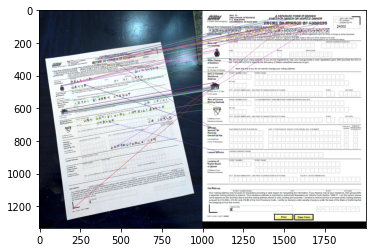

Saving aligned image :  aligned.jpg


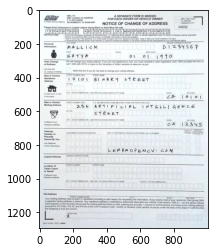

Estimated homography : 
 [[ 1.39715559e+00 -2.00738930e-01 -8.91422787e+00]
 [ 2.22558069e-01  1.51190746e+00 -4.79064534e+02]
 [-6.28846541e-05  1.17130350e-04  1.00000000e+00]]


In [5]:
# Read reference image
refFilename = "form.jpg"
print("Reading reference image : ", refFilename)
imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)

# Read image to be aligned
imFilename = "scanned-form.jpg"
print("Reading image to align : ", imFilename);
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

print("Aligning images ...")
# Registered image will be resotred in imReg.
# The estimated homography will be stored in h.
imReg, h = alignImages(im, imReference)
# Write aligned image to disk.
outFilename = "aligned.jpg"
print("Saving aligned image : ", outFilename);
#cv2.imwrite(outFilename, imReg)
plt.imshow(imReg)
plt.show()
# Print estimated homography
print("Estimated homography : \n",  h)

# Referencias 

* [Image Registration: From SIFT to Deep Learning](https://www.sicara.ai/blog/2019-07-16-image-registration-deep-learning)